In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("banana.csv")
print(data)

        At1    At2  Class
0     1.140 -0.114     -1
1    -1.520 -1.150      1
2    -1.050  0.720     -1
3    -0.916  0.397      1
4    -1.090  0.437      1
...     ...    ...    ...
5295  0.335  1.390      1
5296 -1.700 -0.569      1
5297  2.640  1.140      1
5298  0.769  0.772     -1
5299 -0.255 -0.142      1

[5300 rows x 3 columns]


In [2]:
x=data.iloc[:,0:2].values
y=data.iloc[:,-1].values
print(x)

print(y)

[[ 1.14  -0.114]
 [-1.52  -1.15 ]
 [-1.05   0.72 ]
 ...
 [ 2.64   1.14 ]
 [ 0.769  0.772]
 [-0.255 -0.142]]
[-1  1 -1 ...  1 -1  1]


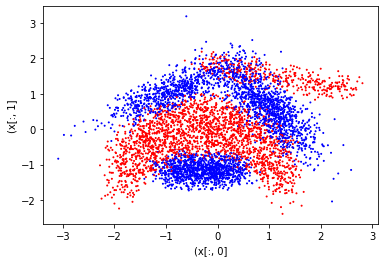

In [4]:
import matplotlib.pyplot as plt
colors = np.array([x for x in "brbmyb"])
plt.scatter(x[:, 0], x[:, 1], color=colors[list(y)].tolist(), s=1) 
plt.xlabel('(x[:, 0]')
plt.ylabel('(x[:, 1]')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [7]:
y_pred

array([ 1,  1, -1, ..., -1, -1,  1], dtype=int64)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8655660377358491
[[2056  296]
 [ 274 1614]]


In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = ['At1', 'At2']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found